In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import tifffile
import seaborn as sns
import matplotlib.pyplot as plt

cell_type_dict = eval(open("ref_data/tome_cell_types").read())
_names = np.array(sorted(list(cell_type_dict.keys())))

In [72]:
def get_332_cmap(ncls):
    import matplotlib
    # cmap_i = np.round((np.arange(ncls+1))/(ncls+1) * 255).astype("uint8")
    cmap_i = np.arange(256)
    cmap_b = (cmap_i % 4)
    # cmap_b[1:] += 1
    cmap_b = cmap_b * 0x40 / 256
    cmap_g = ((cmap_i // 4) % 8) * 0x20 / 256
    cmap_r = (cmap_i // 32) * 0x20 /256
    sel = np.linspace(0, 255, ncls+1).astype(int)
    cmap_list = list(zip(cmap_r[sel], cmap_g[sel], cmap_b[sel]))
    cmap = matplotlib.colors.ListedColormap(cmap_list)
    return cmap

In [3]:
dev_stage = []
cnts = []
for fn in Path("mosta_prediction").glob("*_render.tif"):
    name = fn.stem
    dev_stage.append(float(name.split("_")[0][1:]))
    img = tifffile.imread(fn).astype("uint8")
    cnts.append(np.bincount(img.flat)[1:])
df = pd.DataFrame(index = dev_stage, data=cnts)
df.columns = _names
df

,Amniochorionic mesoderm A,Amniochorionic mesoderm B,Anterior floor plate,Apical ectodermal ridge,Blood progenitors,Brain endothelium,Branchial arch epithelium,Cardiomyocytes,Chondrocyte and osteoblast progenitors,Connective tissue progenitors,...,Roof plate,Second heart field,Skeletal muscle progenitors,Somatic mesoderm,Spinal cord (dorsal),Spinal cord (ventral),Spinal cord excitatory neurons,Spinal cord inhibitory neurons,Splanchnic mesoderm,White blood cells
11.5,70396,14037,7046,372,147,740,56340,99953,568612,136760,...,26237,3182,114845,7319,42128,21255,114187,14014,506750,3927
15.5,446158,33421,2614,1997,414,7481,571488,72410,82371,2551820,...,29136,166,7060,3615,38698,20576,916038,435029,832512,253042
12.5,68782,11430,8244,613,241,2563,99139,171899,231955,365357,...,31032,181,15504,8086,161359,150364,393193,377130,368049,91176
10.5,7343,4101,9766,156,141,111,7326,18087,39275,2290,...,18167,109,18615,393,129791,292886,11655,12351,73225,455
12.5,254656,16904,38412,155,23,529,75014,170296,225792,756258,...,25662,198,3276,3457,28358,13160,236362,118154,664840,12878
16.5,524718,47975,5059,2186,224,13907,1008593,86507,95040,3040209,...,34011,239,10041,7620,150946,245514,1079020,922873,1138198,197117
16.5,360899,17966,1686,1749,63,9933,817526,96593,25813,3428039,...,21578,101,4719,3545,36603,22778,1143214,790919,620114,345439
16.5,295458,39052,4397,2666,471,12403,675523,228185,18226,4030395,...,52794,342,7049,4309,180559,187672,1277231,748694,987401,418423
13.5,338,88,242,1,0,122,5381,24,3005,369526,...,14443,0,15,4,11881,5477,663477,447747,9869,483
16.5,570921,54510,2400,3028,531,14113,567748,275319,23956,3359887,...,39052,284,7692,4536,58664,19816,1290518,769366,1158390,219730


In [13]:
dfs = df.reset_index().groupby("index").mean()
dfs

,Amniochorionic mesoderm A,Amniochorionic mesoderm B,Anterior floor plate,Apical ectodermal ridge,Blood progenitors,Brain endothelium,Branchial arch epithelium,Cardiomyocytes,Chondrocyte and osteoblast progenitors,Connective tissue progenitors,...,Roof plate,Second heart field,Skeletal muscle progenitors,Somatic mesoderm,Spinal cord (dorsal),Spinal cord (ventral),Spinal cord excitatory neurons,Spinal cord inhibitory neurons,Splanchnic mesoderm,White blood cells
index,,,,,,,,,,,,,,,,,,,,,
9.5,26577.200000,13901.200000,2072.400000,213.200000,82.400000,47.000000,9175.600000,25944.400000,45386.000000,3.398000e+02,...,2319.800000,3069.000000,80755.400000,2867.000000,4801.800000,54426.400000,94.600000,74.400000,60788.200000,104.800000
10.5,12055.333333,14621.666667,9632.666667,293.000000,158.000000,373.000000,11181.333333,27732.000000,39943.000000,8.691000e+03,...,17813.333333,223.333333,15981.666667,937.000000,138327.666667,258990.000000,22083.000000,15584.000000,81099.000000,835.666667
11.5,58354.500000,16936.000000,6768.500000,787.500000,195.500000,773.750000,50504.250000,139401.750000,373954.250000,1.552932e+05,...,21391.000000,1284.500000,118565.750000,7150.500000,38177.500000,39267.250000,79550.500000,9690.500000,387182.000000,4458.750000
12.5,154461.333333,14503.833333,13976.333333,554.833333,110.500000,1189.166667,75297.666667,106100.500000,132198.500000,5.670303e+05,...,19150.333333,185.833333,6355.833333,4304.666667,47389.333333,59565.666667,171210.833333,156147.166667,360988.666667,28554.833333
13.5,199139.250000,12523.250000,1431.750000,244.500000,26.500000,1292.750000,178594.750000,50737.750000,100111.500000,1.168910e+06,...,26827.500000,69.500000,934.750000,894.000000,115034.000000,55346.000000,904392.000000,705106.750000,589767.500000,36968.000000
14.5,269789.714286,30735.571429,1923.571429,923.714286,184.142857,2796.428571,285368.714286,108031.428571,44723.142857,2.507085e+06,...,19031.285714,171.571429,4673.142857,3347.142857,36937.000000,30037.857143,419353.142857,230985.142857,707379.285714,74538.285714
15.5,257722.000000,30561.600000,1808.200000,1500.000000,262.000000,5311.400000,471179.400000,31592.600000,34447.400000,2.978179e+06,...,23466.400000,94.200000,4478.800000,2585.400000,22739.000000,10830.800000,580211.000000,287386.600000,751402.200000,142378.400000
16.5,277356.555556,27817.388889,1754.444444,1346.555556,166.222222,6528.555556,485121.388889,80266.722222,17834.555556,3.449620e+06,...,25981.333333,152.166667,4632.888889,2859.944444,40068.777778,38545.611111,602706.722222,357410.611111,652398.722222,198766.277778


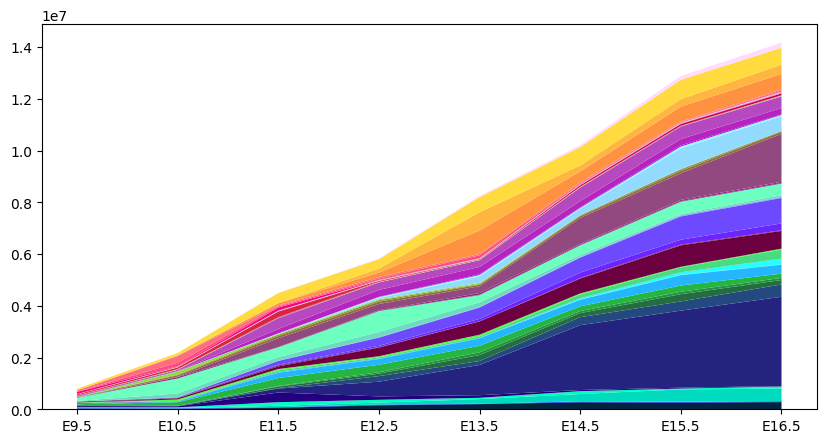

In [5]:
data = [dfs[n] for n in _names]
cmap = get_332_cmap(68)
plt.figure(figsize=(10,5))
_ = plt.stackplot(["E9.5", "E10.5", "E11.5", "E12.5", "E13.5", "E14.5", "E15.5", "E16.5"], *data, labels=_names, colors=cmap.colors[1:])

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels), loc=(1.1,0))

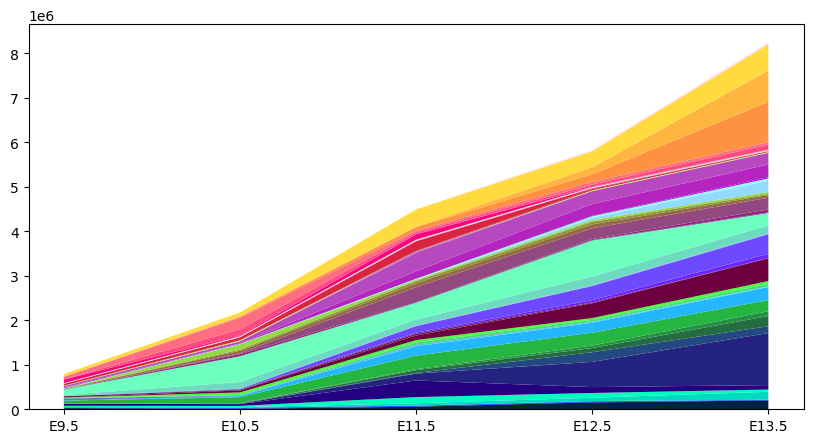

In [14]:
data = [dfs[n].to_numpy()[:5] for n in _names]
cmap = get_332_cmap(68)
plt.figure(figsize=(10,5))
_ = plt.stackplot(["E9.5", "E10.5", "E11.5", "E12.5", "E13.5"], *data, labels=_names, colors=cmap.colors[1:])

In [10]:
dfsn = df.reset_index().groupby("index").sum()
dfsn = dfsn / np.array(dfsn).sum(axis=1, keepdims=True)

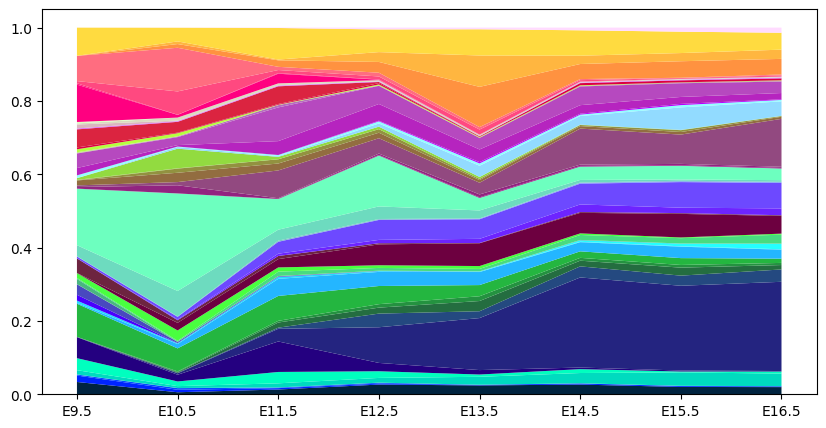

In [11]:
data = [dfsn[n] for n in _names]
cmap = get_332_cmap(68)
plt.figure(figsize=(10,5))
_ = plt.stackplot(["E9.5", "E10.5", "E11.5", "E12.5", "E13.5", "E14.5", "E15.5", "E16.5"], *data, labels=_names, colors=cmap.colors[1:])

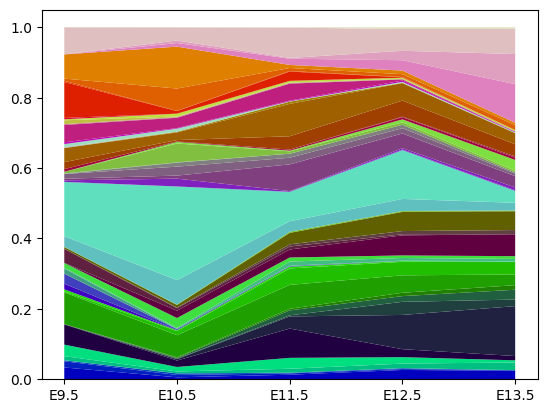

In [79]:
data = [dfsn[n].to_numpy()[:5] for n in _names]
cmap = get_332_cmap(68)
#plt.figure(figsize=(10,5))
_ = plt.stackplot(["E9.5", "E10.5", "E11.5", "E12.5", "E13.5"], *data, labels=_names, colors=cmap.colors[1:])

In [15]:
import anndata as ad

ref = ad.read_h5ad("/home/FCAM/jyu/datasets/tome.h5ad", "r")
obs = ref.obs.dropna()

/home/FCAM/jyu/work/chioso/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [19]:
ref_df = obs.groupby(["development_stage", "celltype"]).count()
ref_df

/tmp/ipykernel_3472383/3771249289.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ref_df = obs.groupby(["development_stage", "celltype"]).count()


UMI_num  gene_number  \
development_stage celltype                                               
9.5               Amniochorionic mesoderm A          1568         1568   
                  Amniochorionic mesoderm B          1214         1214   
                  Anterior floor plate                647          647   
                  Apical ectodermal ridge             502          502   
                  Blood progenitors                   184          184   
...                                                   ...          ...   
13.5              Spinal cord (ventral)              1347         1347   
                  Spinal cord excitatory neurons    28548        28548   
                  Spinal cord inhibitory neurons    19269        19269   
                  Splanchnic mesoderm               14212        14212   
                  White blood cells                  3282         3282   

                                                  unmatched_rate  embryo_id  \
development_stage celltype                                                    
9.5               Amniochorionic mesoderm A                 1568       1568   
                  Amniochorionic mesoderm B                 1214       1214   
                  Anterior floor plate                       647        647   
                  Apical ectodermal ridge                    502        502   
                  Blood progenitors                          184        184   
...                                                          ...        ...   
13.5              Spinal cord (ventral)                     1347       1347   
                  Spinal cord excitatory neurons           28548      28548   
                  Spinal cord inhibitory neurons           19269      19269   
                  Splanchnic mesoderm                      14212      14212   
                  White blood cells                         3282       3282   

                                                  embryo_sex  doublet_score  \
development_stage celltype                                                    
9.5               Amniochorionic mesoderm A             1568           1568   
                  Amniochorionic mesoderm B             1214           1214   
                  Anterior floor plate                   647            647   
                  Apical ectodermal ridge                502            502   
                  Blood progenitors                      184            184   
...                                                      ...            ...   
13.5              Spinal cord (ventral)                 1347           1347   
                  Spinal cord excitatory neurons       28548          28548   
                  Spinal cord inhibitory neurons       19269          19269   
                  Splanchnic mesoderm                  14212          14212   
                  White blood cells                     3282           3282   

                                                  removed_by_low_quality_or_doublets  
development_stage celltype                                                            
9.5               Amniochorionic mesoderm A                                     1568  
                  Amniochorionic mesoderm B                                     1214  
                  Anterior floor plate                                           647  
                  Apical ectodermal ridge                                        502  
                  Blood progenitors                                              184  
...                                                                              ...  
13.5              Spinal cord (ventral)                                         1347  
                  Spinal cord excitatory neurons                               28548  
                  Spinal cord inhibitory neurons                               19269  
                  Splanchnic mesoderm                                     

In [32]:
rdf = ref_df.reset_index().pivot(index="development_stage", columns="celltype", values="UMI_num")
rdf = rdf / np.array(rdf).sum(axis=1, keepdims=True)
rdf

celltype,Amniochorionic mesoderm A,Amniochorionic mesoderm B,Anterior floor plate,Apical ectodermal ridge,Blood progenitors,Brain endothelium,Branchial arch epithelium,Cardiomyocytes,Chondrocyte and osteoblast progenitors,Connective tissue progenitors,...,Roof plate,Second heart field,Skeletal muscle progenitors,Somatic mesoderm,Spinal cord (dorsal),Spinal cord (ventral),Spinal cord excitatory neurons,Spinal cord inhibitory neurons,Splanchnic mesoderm,White blood cells
development_stage,,,,,,,,,,,,,,,,,,,,,
9.5,0.014116,0.010929,0.005825,0.004519,0.001656,0.000000,0.013252,0.000000,0.093466,0.000000,...,0.010056,0.004141,0.058995,0.017087,0.055357,0.068537,0.000000,0.000000,0.051801,0.000000
10.5,0.009606,0.007870,0.006946,0.001325,0.000000,0.000000,0.008846,0.004738,0.054591,0.000000,...,0.004601,0.000000,0.031349,0.008026,0.056034,0.038955,0.021357,0.009191,0.063329,0.002597
11.5,0.008169,0.002692,0.004706,0.000631,0.000000,0.000000,0.005319,0.000620,0.036880,0.062658,...,0.003687,0.000000,0.004764,0.005924,0.056637,0.015075,0.061561,0.031383,0.037295,0.004640
12.5,0.010337,0.001558,0.001472,0.000325,0.000000,0.000000,0.007345,0.000475,0.012671,0.134740,...,0.003235,0.000000,0.000000,0.000000,0.026390,0.007184,0.095277,0.059110,0.046046,0.007239
13.5,0.012775,0.000000,0.000686,0.000000,0.000000,0.002569,0.008181,0.000736,0.000000,0.157696,...,0.003002,0.000000,0.000000,0.000000,0.010433,0.005081,0.107678,0.072679,0.053605,0.012379


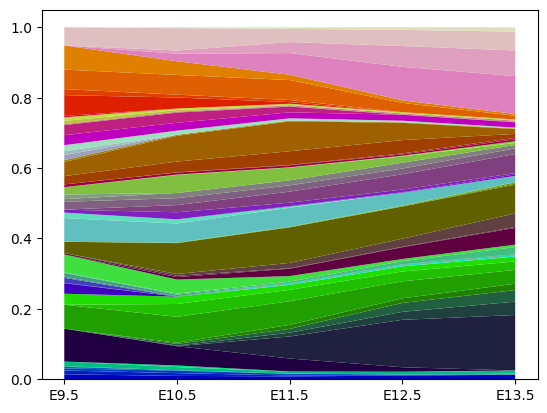

In [78]:
data = [rdf[n].to_numpy() for n in _names]
cmap = get_332_cmap(68)
#plt.figure(figsize=(5,5))
ax = plt.stackplot(["E9.5", "E10.5", "E11.5", "E12.5", "E13.5"], *data, labels=_names, colors=cmap.colors[1:])